comparison of the results of Avellaneda-Stoikov and Gueant models

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('D:/it/cmf/hft/week1/md/md/btcusdt_Binance_LinearPerpetual/lobs.csv')

we will test our model from T_begin = 03 (receive_ts = 1655953200999785662) hours to T_end = 09 hours (receive_ts = 1655974797846439628)

our volatility

In [3]:
df = df.loc[314000:957000,:]
df['btcusdt:Binance:LinearPerpetual_ask_price_0'].std()

121.22730583347499

In [4]:
df['receive_ts'] = pd.to_datetime(df['receive_ts'])

other parameters: 
k = 1.0

now we will tune our gamma coefficient in order to find optimal P&L graph

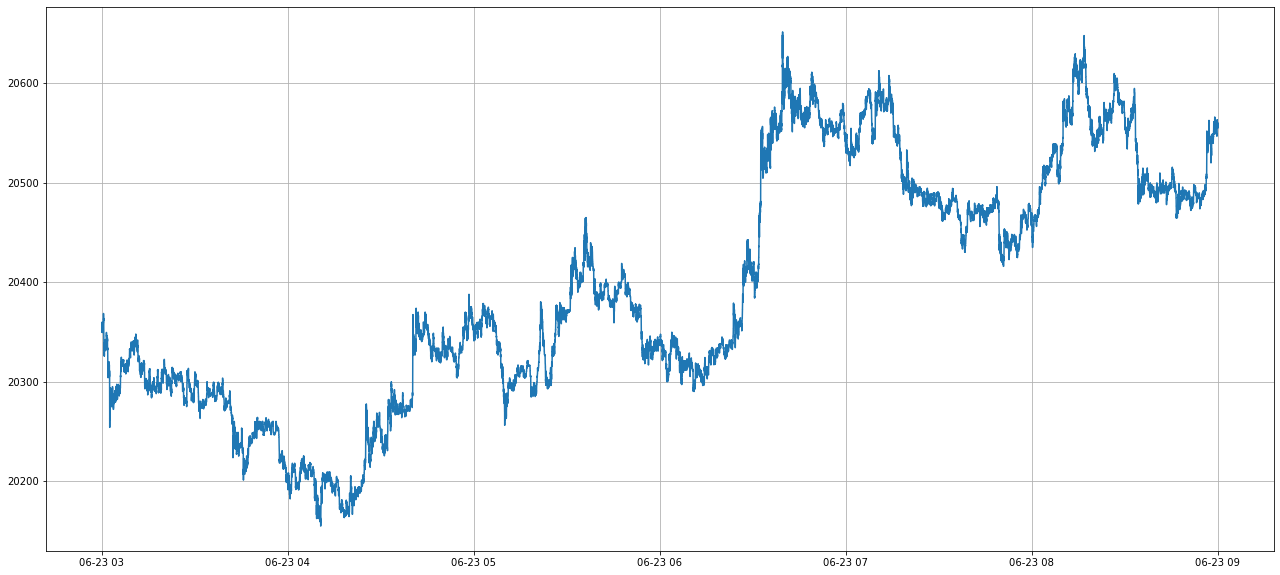

In [5]:
plt.figure(figsize=(22,10))
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'])
plt.grid()
plt.show()

In [6]:
total_pnl_stoikov_1 = pd.read_csv('total_pnl_stoikov_1.csv')
total_pnl_stoikov_2 = pd.read_csv('total_pnl_stoikov_2.csv')
total_pnl_stoikov_3 = pd.read_csv('total_pnl_stoikov_3.csv')
total_pnl_stoikov_4 = pd.read_csv('total_pnl_stoikov_4.csv')
total_q_stoikov_1 = pd.read_csv('total_q_stoikov_1.csv')
total_q_stoikov_2 = pd.read_csv('total_q_stoikov_2.csv')
total_q_stoikov_3 = pd.read_csv('total_q_stoikov_3.csv')
total_q_stoikov_4 = pd.read_csv('total_q_stoikov_4.csv')

In [7]:
total_pnl_stoikov_1['receive_ts']=pd.to_datetime(total_pnl_stoikov_1['receive_ts'])
total_pnl_stoikov_2['receive_ts']=pd.to_datetime(total_pnl_stoikov_2['receive_ts'])
total_pnl_stoikov_3['receive_ts']=pd.to_datetime(total_pnl_stoikov_3['receive_ts'])
total_pnl_stoikov_4['receive_ts']=pd.to_datetime(total_pnl_stoikov_4['receive_ts'])
total_q_stoikov_1['1'] = pd.to_datetime(total_q_stoikov_1['1'])
total_q_stoikov_2['1'] = pd.to_datetime(total_q_stoikov_2['1'])
total_q_stoikov_3['1'] = pd.to_datetime(total_q_stoikov_3['1'])
total_q_stoikov_4['1'] = pd.to_datetime(total_q_stoikov_4['1'])

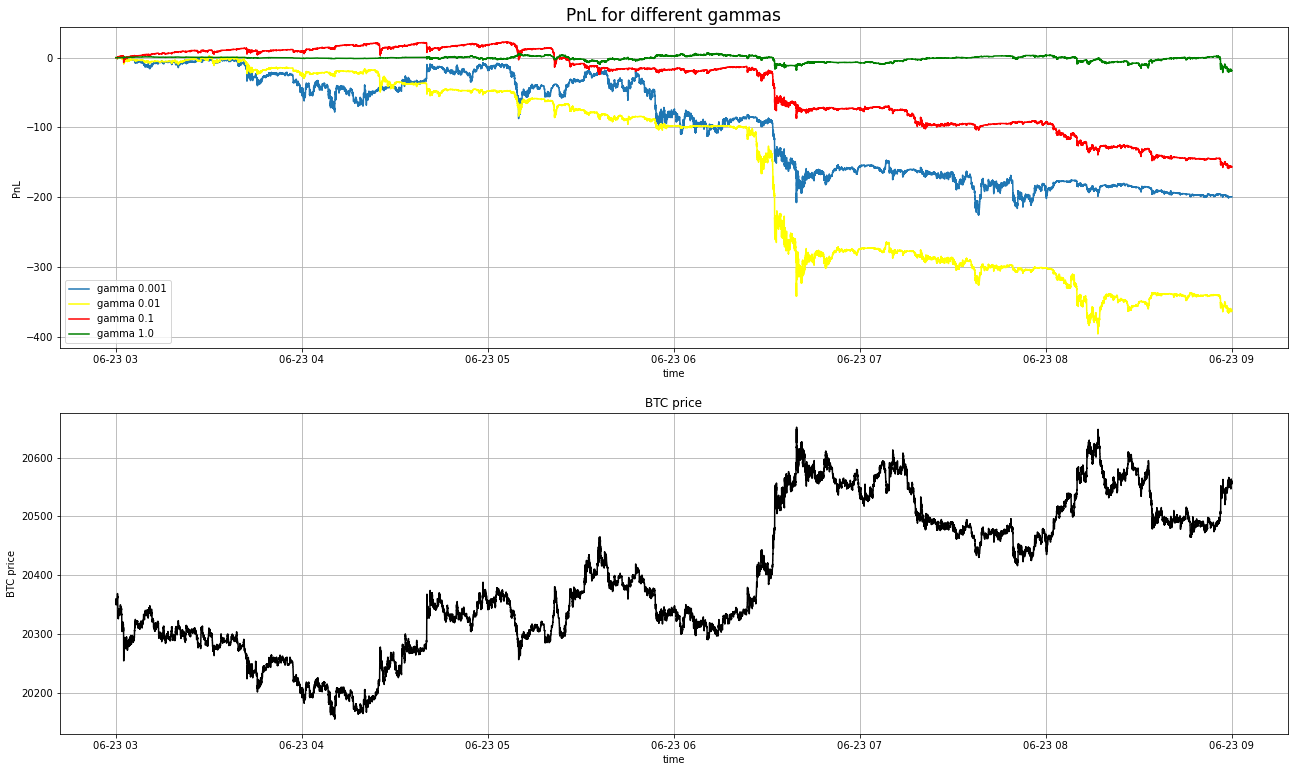

In [9]:
plt.figure(figsize=(22,13))

plt.subplot(2, 1, 1)
plt.plot(total_pnl_stoikov_1['receive_ts'],total_pnl_stoikov_1['total'], label = 'gamma 0.001')
plt.plot(total_pnl_stoikov_2['receive_ts'],total_pnl_stoikov_2['total'], color='yellow', label = 'gamma 0.01')
plt.plot(total_pnl_stoikov_3['receive_ts'],total_pnl_stoikov_3['total'], color='red', label = 'gamma 0.1')
plt.plot(total_pnl_stoikov_4['receive_ts'],total_pnl_stoikov_4['total'], color='green', label = 'gamma 1.0')
plt.xlabel('time')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

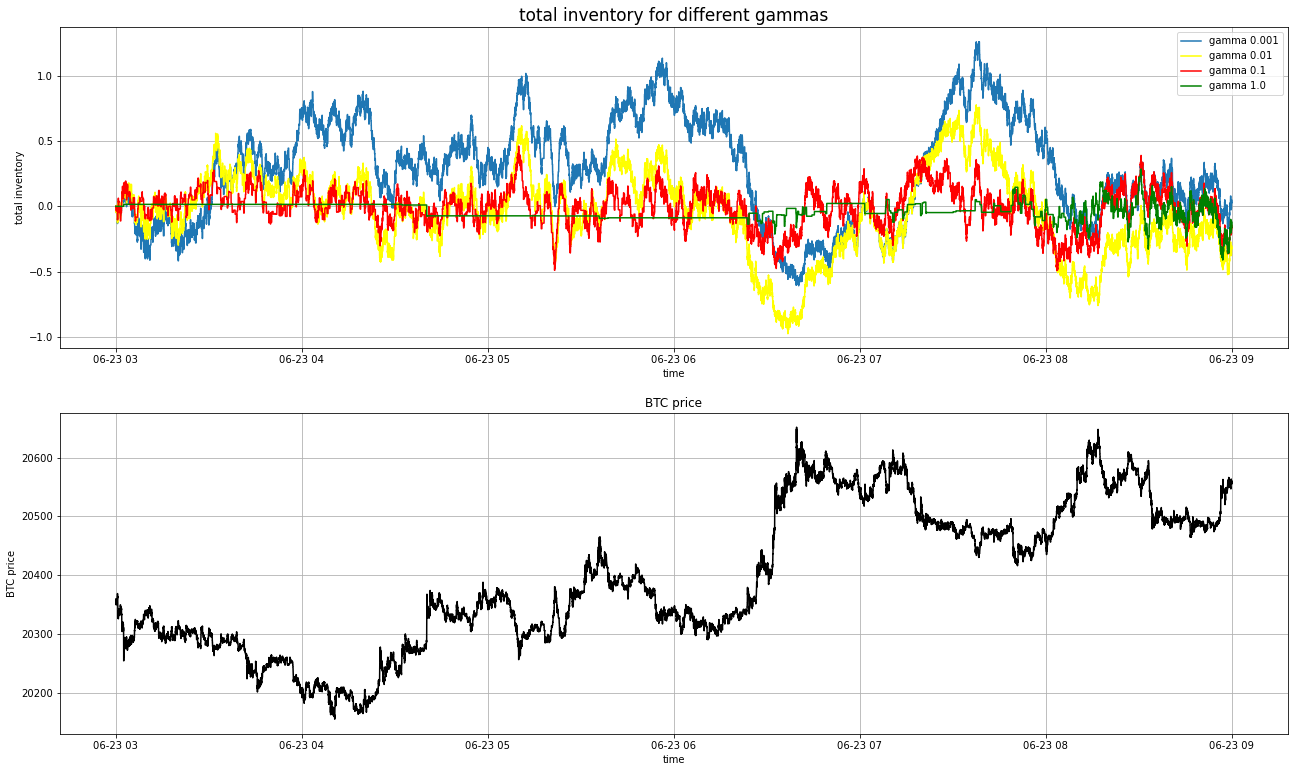

In [10]:
plt.figure(figsize=(22,13))

plt.subplot(2,1,1)
plt.plot(total_q_stoikov_1['1'],total_q_stoikov_1['0'], label = 'gamma 0.001')
plt.plot(total_q_stoikov_2['1'],total_q_stoikov_2['0'], color='yellow', label = 'gamma 0.01')
plt.plot(total_q_stoikov_3['1'],total_q_stoikov_3['0'], color='red', label = 'gamma 0.1')
plt.plot(total_q_stoikov_4['1'],total_q_stoikov_4['0'], color='green', label = 'gamma 1.0')
plt.xlabel('time')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

as we can see, model with gamma = 1.0 has very scarce amount of trades. this is because agent's bid-ask spread is huge (agent places orders so deep in order book) \
models with gammas = [0.01, 0.001] seem more sensitive to sharp changes in btc price. \
model with gamma = 0.1 seems more robust in comparison to other models. \
so we choose gamma = 0.1

now lets test gueant's model
we will consider the same gammas range (k =  1.0, A = 1.0)

In [11]:
total_pnl_gueant_1 = pd.read_csv('total_pnl_gueant_1.csv')
total_pnl_gueant_2 = pd.read_csv('total_pnl_gueant_2.csv')
total_pnl_gueant_3 = pd.read_csv('total_pnl_gueant_3.csv')
total_pnl_gueant_4 = pd.read_csv('total_pnl_gueant_4.csv')
total_q_gueant_1 = pd.read_csv('total_q_gueant_1.csv')
total_q_gueant_2 = pd.read_csv('total_q_gueant_2.csv')
total_q_gueant_3 = pd.read_csv('total_q_gueant_3.csv')
total_q_gueant_4 = pd.read_csv('total_q_gueant_4.csv')

In [12]:
total_pnl_gueant_1['receive_ts']=pd.to_datetime(total_pnl_gueant_1['receive_ts'])
total_pnl_gueant_2['receive_ts']=pd.to_datetime(total_pnl_gueant_2['receive_ts'])
total_pnl_gueant_3['receive_ts']=pd.to_datetime(total_pnl_gueant_3['receive_ts'])
total_pnl_gueant_4['receive_ts']=pd.to_datetime(total_pnl_gueant_4['receive_ts'])
total_q_gueant_1['1'] = pd.to_datetime(total_q_gueant_1['1'])
total_q_gueant_2['1'] = pd.to_datetime(total_q_gueant_2['1'])
total_q_gueant_3['1'] = pd.to_datetime(total_q_gueant_3['1'])
total_q_gueant_4['1'] = pd.to_datetime(total_q_gueant_4['1'])

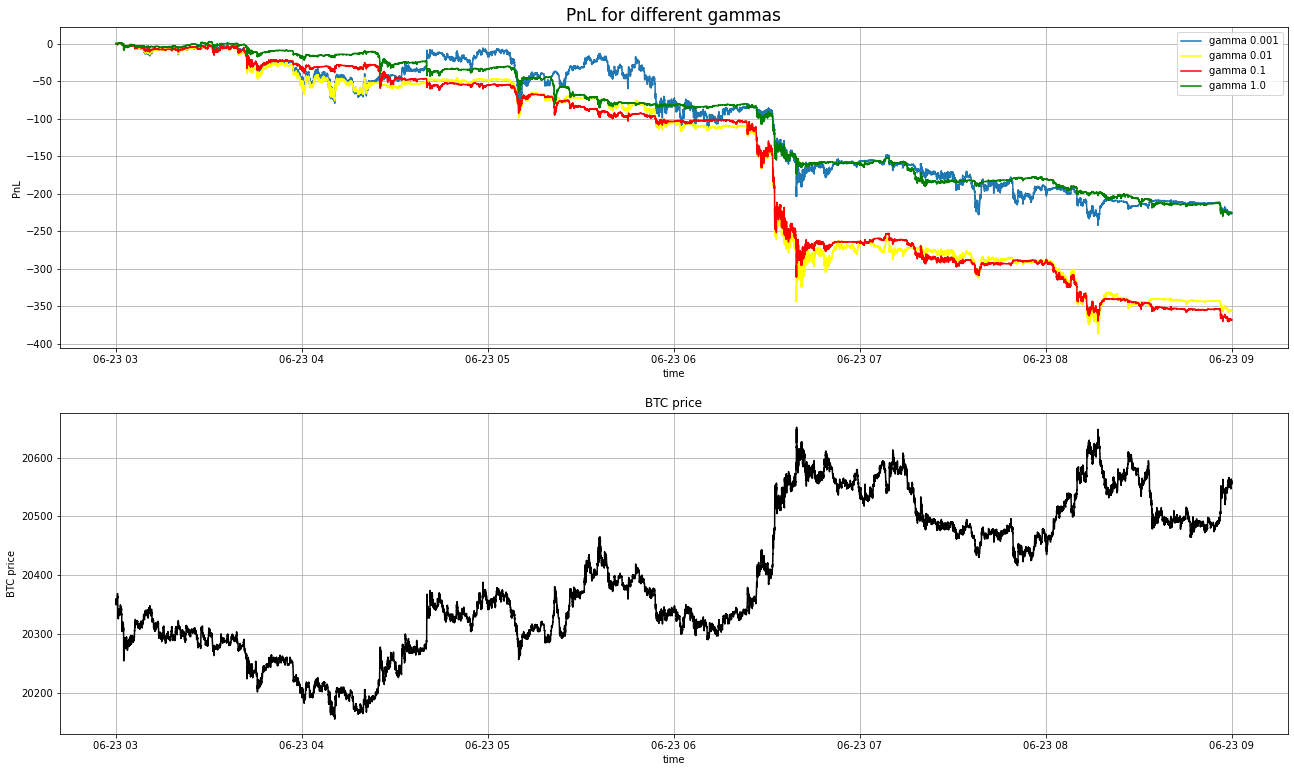

In [13]:
plt.figure(figsize=(22,13))

plt.subplot(2, 1, 1)
plt.plot(total_pnl_gueant_1['receive_ts'],total_pnl_gueant_1['total'], label = 'gamma 0.001')
plt.plot(total_pnl_gueant_2['receive_ts'],total_pnl_gueant_2['total'], color='yellow', label = 'gamma 0.01')
plt.plot(total_pnl_gueant_3['receive_ts'],total_pnl_gueant_3['total'], color='red', label = 'gamma 0.1')
plt.plot(total_pnl_gueant_4['receive_ts'],total_pnl_gueant_4['total'], color='green', label = 'gamma 1.0')
plt.xlabel('time')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

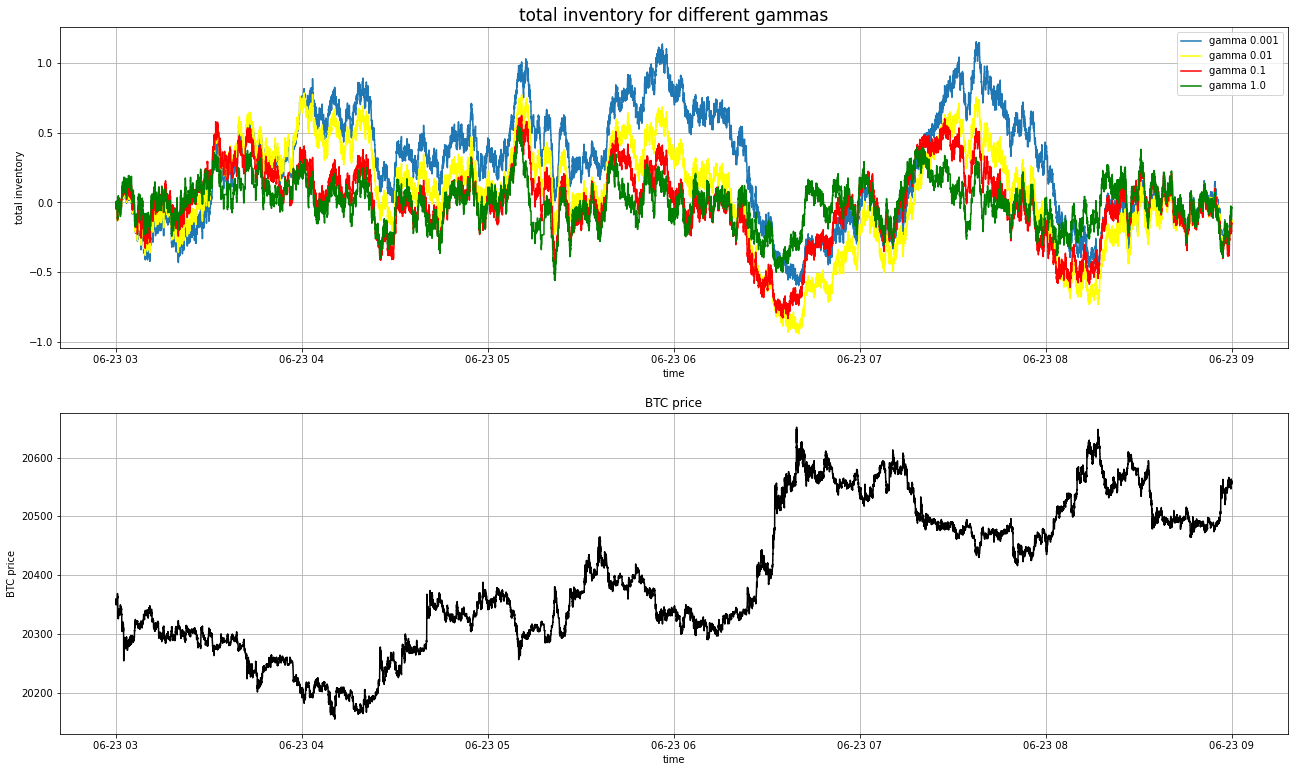

In [14]:
plt.figure(figsize=(22,13))

plt.subplot(2,1,1)
plt.plot(total_q_gueant_1['1'],total_q_gueant_1['0'], label = 'gamma 0.001')
plt.plot(total_q_gueant_2['1'],total_q_gueant_2['0'], color='yellow', label = 'gamma 0.01')
plt.plot(total_q_gueant_3['1'],total_q_gueant_3['0'], color='red', label = 'gamma 0.1')
plt.plot(total_q_gueant_4['1'],total_q_gueant_4['0'], color='green', label = 'gamma 1.0')
plt.xlabel('time')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

as we can see, in Gueant's model gammas = [0.1, 0.01] are inappropriate in comparison to [0.001, 1.0] gammas. \
lets take gamma = 0.001, because its P&L semms better than P&L when gamma = 1.0

but there is one problem - in Avellaneda-Stoikov and Gueant models authors suppose that volatility = const. obviously, it's not true. so lets try to calculate volatility in the moment T as volatility on the segment [T-deltaT, T+deltaT], where deltaT = 0.5 hours. 

In [15]:
total_pnl_gueant_moving_vol = pd.read_csv('total_pnl_gueant_moving_vol.csv')
total_q_gueant_moving_vol = pd.read_csv('total_q_gueant_moving_vol.csv')
volatility = pd.read_csv('moving_vol.csv')

In [16]:
total_pnl_gueant_moving_vol['receive_ts'] = pd.to_datetime(total_pnl_gueant_moving_vol['receive_ts'])
total_q_gueant_moving_vol['1'] = pd.to_datetime(total_q_gueant_moving_vol['1'])
volatility['1'] = pd.to_datetime(volatility['1'])

first of all, lets take a look on our volatility

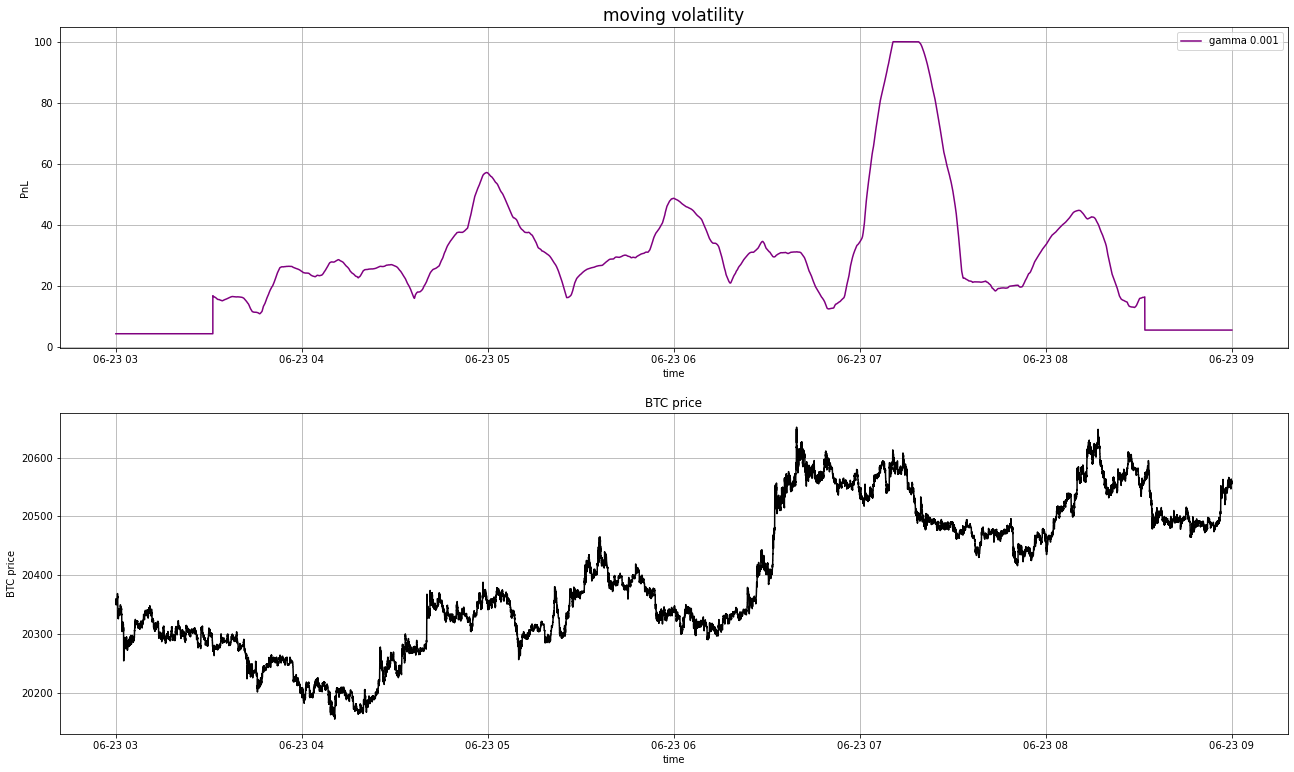

In [17]:
plt.figure(figsize=(22,13))

plt.subplot(2, 1, 1)
plt.plot(volatility['1'], volatility['0'], color='purple', label = 'gamma 0.001')
plt.xlabel('time')
plt.ylabel('PnL')
plt.title('moving volatility', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

now lets compare results with constant volatility and moving volatility for Gueant's model (gamma = 0.001)

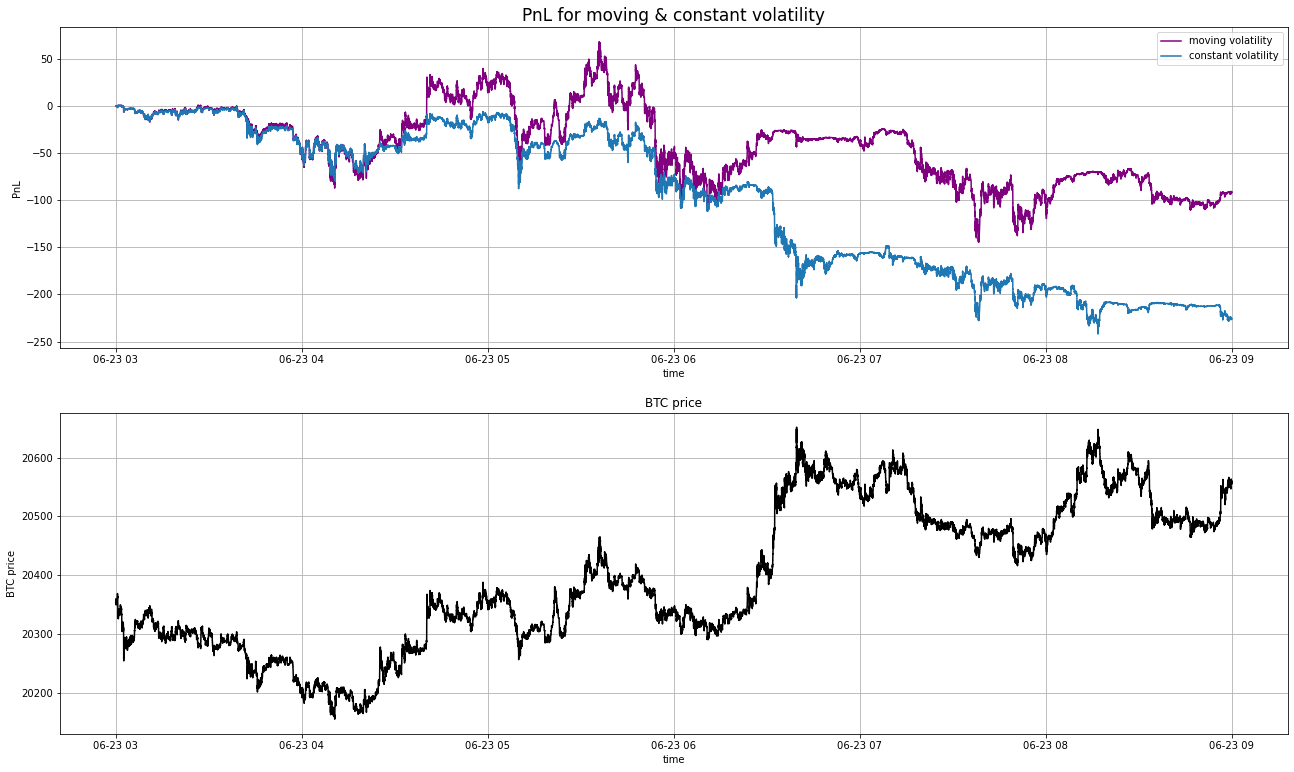

In [18]:
plt.figure(figsize=(22,13))

plt.subplot(2, 1, 1)
plt.plot(total_pnl_gueant_moving_vol['receive_ts'],total_pnl_gueant_moving_vol['total'], color='purple', label = 'moving volatility')
plt.plot(total_pnl_gueant_1['receive_ts'],total_pnl_gueant_1['total'], label = 'constant volatility')
plt.xlabel('time')
plt.ylabel('PnL')
plt.title('PnL for moving & constant volatility', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

and lets compare inventories for these cases

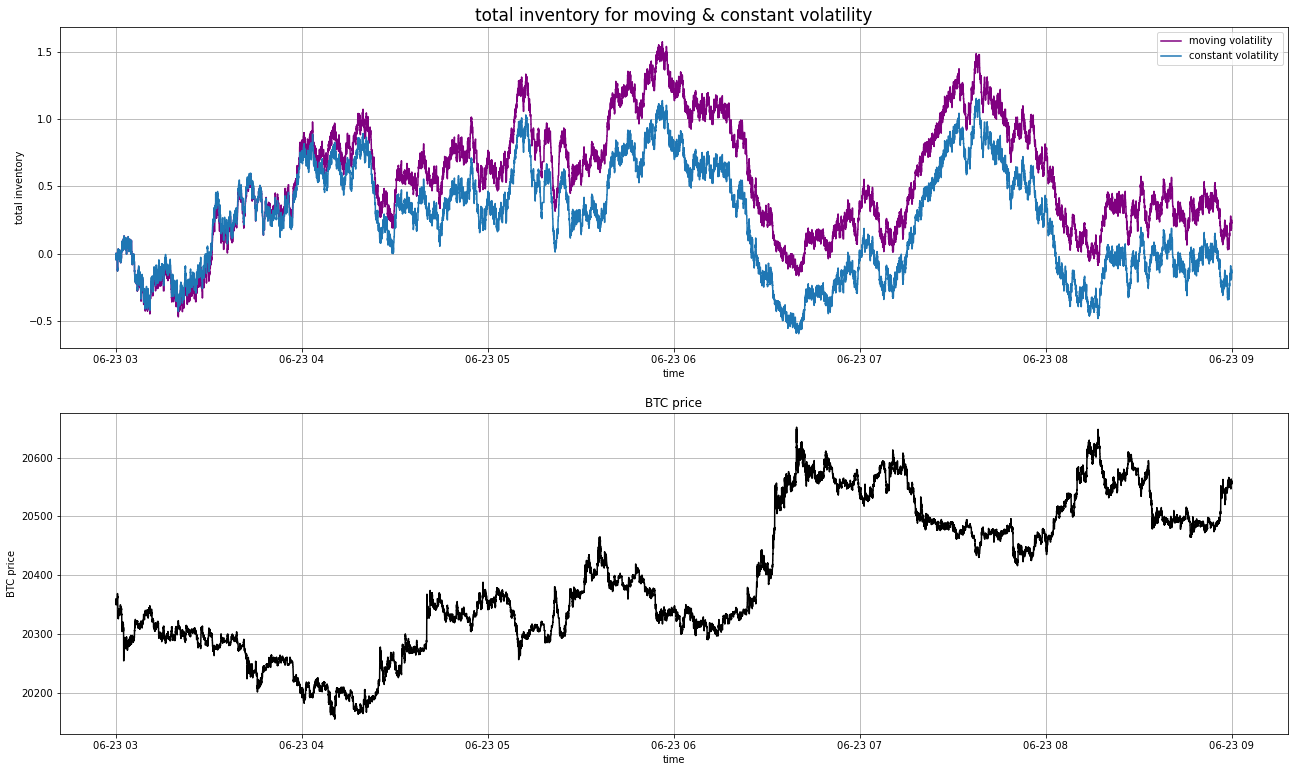

In [19]:
plt.figure(figsize=(22,13))

plt.subplot(2,1,1)
plt.plot(total_q_gueant_moving_vol['1'],total_q_gueant_moving_vol['0'], color='purple', label = 'moving volatility')
plt.plot(total_q_gueant_1['1'],total_q_gueant_1['0'], label = 'constant volatility')
plt.xlabel('time')
plt.ylabel('total inventory')
plt.title('total inventory for moving & constant volatility', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

finally, lets compare these results with Stoikov's model!

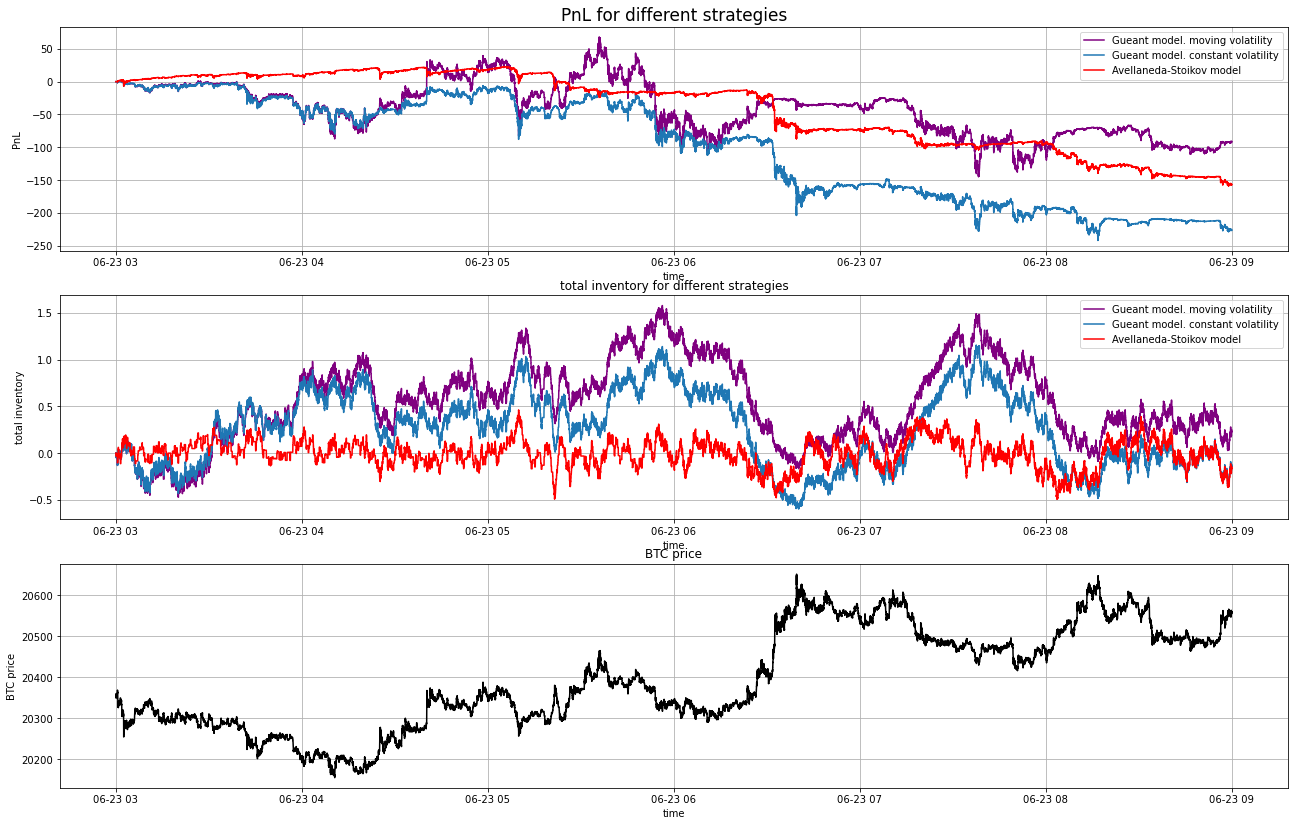

In [21]:
plt.figure(figsize=(22,14))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_gueant_moving_vol['receive_ts'],total_pnl_gueant_moving_vol['total'], color='purple', label = 'Gueant model. moving volatility')
plt.plot(total_pnl_gueant_1['receive_ts'],total_pnl_gueant_1['total'], label = 'Gueant model. constant volatility')
plt.plot(total_pnl_stoikov_3['receive_ts'],total_pnl_stoikov_3['total'], color='red', label = 'Avellaneda-Stoikov model')
plt.xlabel('time')
plt.ylabel('PnL')
plt.title('PnL for different strategies', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_gueant_moving_vol['1'],total_q_gueant_moving_vol['0'], color='purple', label = 'Gueant model. moving volatility')
plt.plot(total_q_gueant_1['1'],total_q_gueant_1['0'], label = 'Gueant model. constant volatility')
plt.plot(total_q_stoikov_3['1'],total_q_stoikov_3['0'], color='red', label = 'Avellaneda-Stoikov model')
plt.xlabel('time')
plt.ylabel('total inventory')
plt.title('total inventory for different strategies')
plt.legend()
plt.grid()


plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('BTC price')
plt.title('BTC price')
plt.grid()

plt.show()

as we can see, moving volatility really improves our PnL behavior. this improvement makes Gueant's model more suitable, because on Avellaneda-Stoikov graph we can see negative trend (despite the fact that PnLs almost equal)